# Lab 6 - SIR Model 

In this lab we try to include some realistic effects in the SIR model and examine their role.

S - Susceptibles

I - Infected 

R - Recovered

In [80]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [1040]:
t_final = 200
t_start = 0
dt = 0.1  #time step 
n = int(t_final-t_start/dt) # number of time intervals 
N = 762 # total number of people in the population 

In [1041]:
S = np.zeros(n)
I = np.zeros(n)  #Storing infecteds 
R = np.zeros(n)  #Storing recovereds

In [1042]:
S[0] = N-1 #initial susceptibles - the entire population 
I[0] = 1 #initially, nobody is infected 
R[0] = 0 #hence, the number of recovereds is zero 

In [1043]:
def susceptible(beta, S, I):
    return (-beta)*S*I

def infected(beta, alpha, S, I):
    return (beta)*S*I - alpha*I

def recovered(alpha, I):
    return (alpha)*I

In [1044]:
beta = 0.00218
alpha = 0.5

In [1045]:
# Equation for susceptible v time 

for i in range(1,n):
    S[i] = S[i-1] + susceptible(beta, S[i-1], I[i-1])*dt
    I[i] = I[i-1] + infected(beta, alpha, S[i-1], I[i-1])*dt
    R[i] = R[i-1] + recovered(alpha, I[i-1])*dt

# Plot - 6.3.2 Shiflet

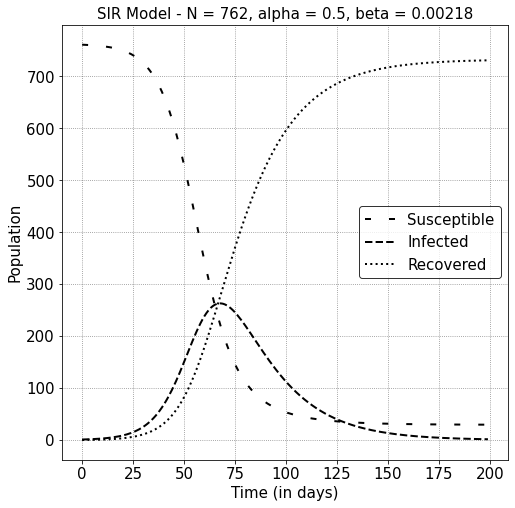

In [1046]:
#make figure
fig, ax = plt.subplots(figsize=[8,8])
t = np.linspace(0,t_final, int(n))

#plots
plt.plot(S, label='Susceptible', ls=(0, (3, 9)),lw=2, color='k')
plt.plot(I, label='Infected',ls='--',lw=2, color='k')
plt.plot(R, label='Recovered',ls=':',lw=2, color='k')

#plot formatting
plt.xlabel('Time (in days)', fontsize=15, color='k')
plt.ylabel('Population', fontsize=15, color='k')
plt.title('SIR Model - N = {}, alpha = {}, beta = {}'.format(N,alpha,beta), fontsize=15, color='k')
plt.legend(fontsize=15, loc='best', edgecolor = 'k')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid( color='k', alpha=0.5, ls=':')

#show plot
plt.show()

R0 = basic reproduction number = beta/alpha


In [1047]:
#beta_val = [0.002, 0.003, 0.004, 0.005, 0.01, 0.1,0.15,0.2,0.25, 0.3, 0.35, 0.4]
#alpha_val = [0.5, 0.4, 0.3, 0.2, 0.1, 0.2,0.1,0.1,0.1, 0.1, 0.1, 0.1]
beta_val = np.linspace(0.0001, 0.0009, 20) #infection rate
alpha_val = [0.3 for i in range(len(beta_val))] #recovery rate


In [1048]:
sus = [[0 for i in range(n)] for j in range(len(beta_val)+1)] 
inf = [[0 for i in range(n)] for j in range(len(beta_val)+1)]
rec = [[0 for i in range(n)] for j in range(len(beta_val)+1)]
for k in range(len(beta_val)):
    sus[k][0] = N-10
    inf[k][0] = 10
print(np.shape(sus))
for j in range(0,len(beta_val)):
    for i in range(1,n):
    
        sus[j][i] = sus[j][i-1] + susceptible(beta_val[j], sus[j][i-1], inf[j][i-1])*dt
        inf[j][i] = inf[j][i-1] + infected(beta_val[j], alpha_val[j], sus[j][i-1], inf[j][i-1])*dt
        rec[j][i] = rec[j][i-1] + recovered(alpha_val[j], inf[j][i-1])*dt



(21, 200)


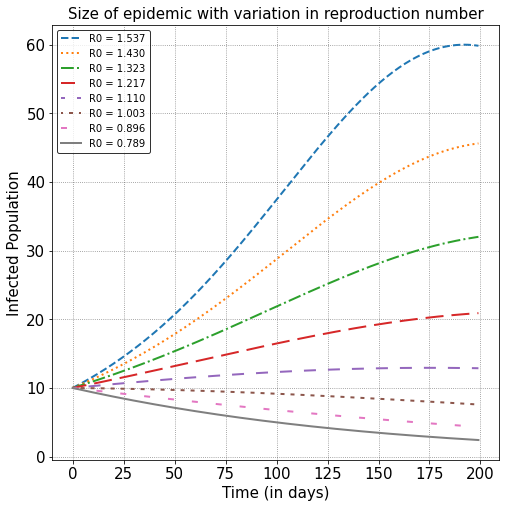

In [1049]:
#make figure
fig, ax = plt.subplots(figsize=[8,8])
t = np.linspace(0,t_final, int(n))

#colours 
col = ['k','b','g','r','y','grey','cyan','brown']
ls = ['--',':','-.',(2,(9,4)),(4,(6,6)),(6,(2,3)),(0, (3, 9)),'-']
#plots
j=0
for i in range(len(beta_val)-8,4,-1):
    #plt.plot(sus[i], label='Sus R0 = {:.3f}'.format(beta_val[i]/alpha_val[i]), ls=(0, (3, 9)),lw=2, color=col[i])
    plt.plot(inf[i], label='R0 = {:.3f}'.format(beta_val[i]/alpha_val[i]*N),ls=ls[j],lw=2)
    j=j+1
    #plt.plot(rec[i], label='Recovered',ls=':',lw=2, color=col[i])

#plot formatting
plt.xlabel('Time (in days)', fontsize=15, color='k')
plt.ylabel('Infected Population', fontsize=15, color='k')
plt.title('Size of epidemic with variation in reproduction number', fontsize=15, color='k')
plt.legend(fontsize=10, loc='best', edgecolor = 'k')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid( color='k', alpha=0.5, ls=':')

#show plot
plt.show()


In [1050]:
sums = np.zeros(len(beta_val))
for i in range(len(beta_val)):
    sums[i]= (np.array(inf[i]).max())
print(sums)

[ 10.          10.          10.          10.          10.
  10.          10.          10.          12.93301507  20.89765795
  32.01179454  45.62153584  60.00369387  74.63073932  89.34680184
 103.93228805 118.24350034 132.19514289 145.73518492 158.83753037]


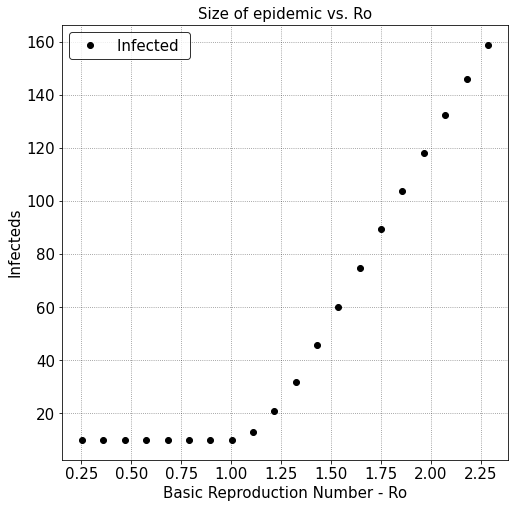

In [1051]:
#make figure
fig, ax = plt.subplots(figsize=[8,8])
t = np.linspace(0,t_final, int(n))

r = np.array(beta_val)/np.array(alpha_val)*(N)

#plots

plt.plot(r,sums, 'ko',label='Infected ',lw=2)
    #plt.plot(rec[i], label='Recovered',ls=':',lw=2, color=col[i])

#plot formatting
plt.xlabel('Basic Reproduction Number - Ro', fontsize=15, color='k')
plt.ylabel('Infecteds', fontsize=15, color='k')
plt.title('Size of epidemic vs. Ro', fontsize=15, color='k')
plt.legend(fontsize=15, loc='best', edgecolor = 'k')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid( color='k', alpha=0.5, ls=':')

#show plot
plt.show()

# Varying initial susceptibles

In [1052]:
t_final = 130
t_start = 0
dt = 0.1  #time step 
n = int(t_final-t_start/dt) # number of time intervals 
N = 762 # total number of people in the population 

In [1053]:
s = np.arange(N-100,N,10)
s

array([662, 672, 682, 692, 702, 712, 722, 732, 742, 752])

In [1054]:
sus_var = np.array([[0 for i in range(n)] for j in range(len(s)+1)])
inf = np.array([[0 for i in range(n)] for j in range(len(s)+1)])
rec = np.array([[0 for i in range(n)] for j in range(len(s)+1)])
inf

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [1055]:
beta = 0.00218
alpha = 0.5
for j in range(len(s)):
    sus_var[j][0] = s[j]
    inf[j][0] = 10
    print(j)
    for i in range(1,n):
        sus_var[j][i] = sus_var[j][i-1] + susceptible(beta, sus_var[j][i-1], inf[j][i-1])*dt
        inf[j][i] = inf[j][i-1] + infected(beta, alpha, sus_var[j][i-1], inf[j][i-1])*dt
        rec[j][i] = rec[j][i-1] + recovered(alpha, inf[j][i-1])*dt
inf[1]

0
1
2
3
4
5
6
7
8
9


array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

9
8
7
6
5
4
3


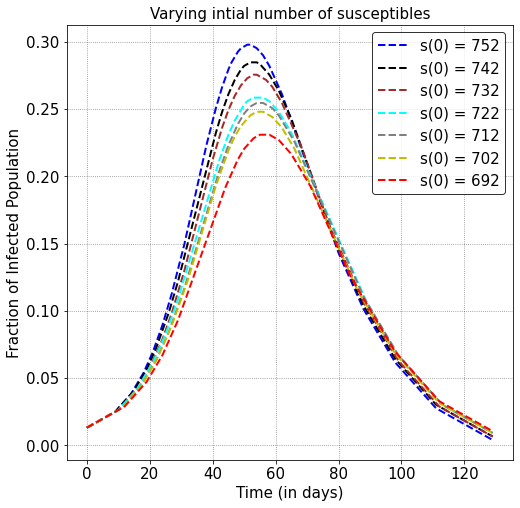

In [1056]:
#make figure
fig, ax = plt.subplots(figsize=[8,8])
t = np.linspace(0,t_final, int(n))

#colours 
col = ['k','b','g','r','y','grey','cyan','brown','k','b','g']
#plots
for i in range(len(s)-1,2,-1):
    print(i)
    #plt.plot(sus[i], label='Sus R0 = {:.3f}'.format(beta_val[i]/alpha_val[i]), ls=(0, (3, 9)),lw=2, color=col[i])
    plt.plot(np.array(inf[i])/N, label='s(0) = {:.0f}'.format(s[i]),ls='--',lw=2, color=col[i])
    #plt.plot(rec[i], label='Recovered',ls=':',lw=2, color=col[i])

#plot formatting
plt.xlabel('Time (in days)', fontsize=15, color='k')
plt.ylabel('Fraction of Infected Population', fontsize=15, color='k')
plt.title('Varying intial number of susceptibles', fontsize=15, color='k')
plt.legend(fontsize=15, loc='best', edgecolor = 'k')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid( color='k', alpha=0.5, ls=':')

#show plot
plt.show()

# Considering the effects of vaccination

In [1072]:
def susceptible_v(beta, v, S, I):
    return (-beta)*S*I - v*S
def susceptible_v_mu(beta, v, mu, S, I):
    return (-beta)*S*I - v*S + mu*v*S

In [1155]:
t_final = 100
t_start = 0
dt = 0.1  #time step 
n = int((t_final-t_start)/dt) # number of time intervals 
N = 762 # total number of people in the population 

S = np.zeros(n)
I = np.zeros(n)  #Storing infecteds 
R = np.zeros(n)  #Storing recovereds
n

1000

In [1156]:
beta = 0.00218
alpha = 0.5
v = 0.15
N = 762

In [1157]:
# Equation for susceptible v time 
S[0] = N
I[0] = 1

for i in range(1,int(3/dt +1)):
    S[i] = S[i-1] + susceptible(beta,S[i-1], I[i-1])*dt
    I[i] = I[i-1] + infected(beta, alpha, S[i-1], I[i-1])*dt
    R[i] = R[i-1] + recovered(alpha, I[i-1])*dt
for i in range(int(3/dt+1),n):
    S[i] = S[i-1] + susceptible_v(beta,v,S[i-1], I[i-1])*dt
    I[i] = I[i-1] + infected(beta, alpha, S[i-1], I[i-1])*dt
    R[i] = R[i-1] + recovered(alpha, I[i-1])*dt

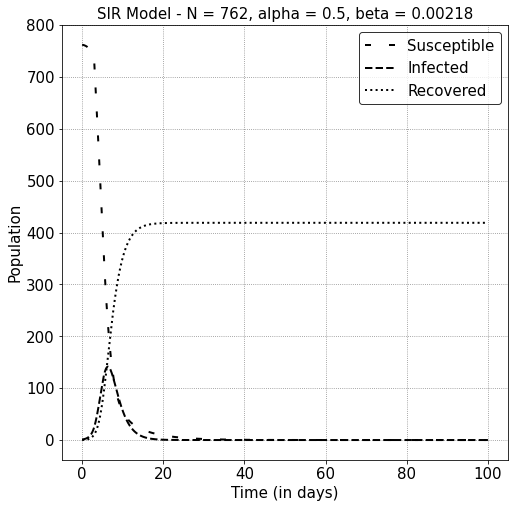

In [1158]:
#make figure
fig, ax = plt.subplots(figsize=[8,8])
t = np.linspace(0,t_final, int(n))

#plots
plt.plot(t,S, label='Susceptible', ls=(0, (3, 9)),lw=2, color='k')
plt.plot(t,I, label='Infected',ls='--',lw=2, color='k')
plt.plot(t,R, label='Recovered',ls=':',lw=2, color='k')

#plot formatting
plt.xlabel('Time (in days)', fontsize=15, color='k')
plt.ylabel('Population', fontsize=15, color='k')
plt.title('SIR Model - N = {}, alpha = {}, beta = {}'.format(N,alpha,beta), fontsize=15, color='k')
plt.legend(fontsize=15, loc='best', edgecolor = 'k')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid( color='k', alpha=0.5, ls=':')

#show plot
plt.show()

In [1159]:
# Equation for susceptible v time 
S[0] = N
I[0] = 1
R[0] = 0
mu = 0.15 # vaccine efficacy variable (1-mu = efficacy rate of vaccine)
for i in range(1,n):
    S[i] = S[i-1] + susceptible_v_mu(beta,v, mu,S[i-1], I[i-1])*dt
    I[i] = I[i-1] + infected(beta, alpha, S[i-1], I[i-1])*dt
    R[i] = R[i-1] + recovered(alpha, I[i-1])*dt

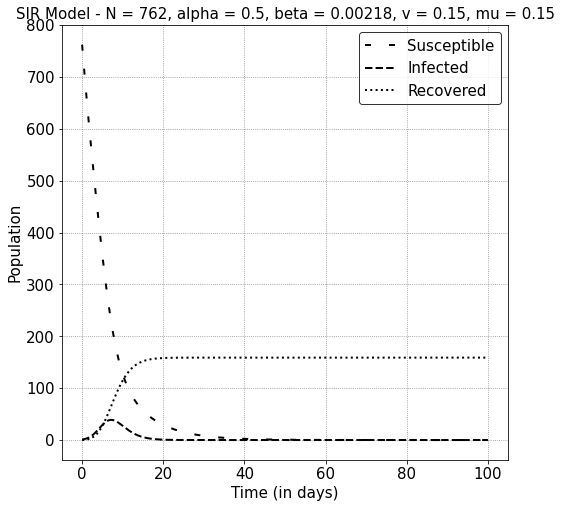

In [1160]:
#make figure
fig, ax = plt.subplots(figsize=[8,8])
t = np.linspace(0,t_final, int(n))

#plots
plt.plot(t,S, label='Susceptible', ls=(0, (3, 9)),lw=2, color='k')
plt.plot(t,I, label='Infected',ls='--',lw=2, color='k')
plt.plot(t,R, label='Recovered',ls=':',lw=2, color='k')

#plot formatting
plt.xlabel('Time (in days)', fontsize=15, color='k')
plt.ylabel('Population', fontsize=15, color='k')
plt.title('SIR Model - N = {}, alpha = {}, beta = {}, v = {}, mu = {}'.format(N,alpha,beta,v,mu), fontsize=15, color='k')
plt.legend(fontsize=15, loc='best', edgecolor = 'k')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid( color='k', alpha=0.5, ls=':')

#show plot
plt.show()

# Incorporating lockdown

In [1268]:
# Equation for susceptible v time 


t_final = 100
t_start = 0
dt = 0.1  #time step 
n = int((t_final-t_start)/dt) # number of time intervals 
N = 762 # total number of people in the population 


S = np.zeros(n)
I = np.zeros(n)  #Storing infecteds 
R = np.zeros(n)  #Storing recovereds


S[0] = N
I[0] = 1
R[0] = 0
beta = 0.00218
alpha = 0.5

for i in range(1,int(10/dt + 1)):
    S[i] = S[i-1] + susceptible(beta,S[i-1], I[i-1])*dt
    I[i] = I[i-1] + infected(beta, alpha, S[i-1], I[i-1])*dt
    R[i] = R[i-1] + recovered(alpha, I[i-1])*dt
for i in range(int(10/dt + 1), int(30/dt + 1)):
    beta = beta - 0.1*beta
   
    S[i] = S[i-1] + susceptible(beta,S[i-1], I[i-1])*dt
    I[i] = I[i-1] + infected(beta, alpha, S[i-1], I[i-1])*dt
    R[i] = R[i-1] + recovered(alpha, I[i-1])*dt
for i in range(int(30/dt + 1), int(60/dt +1)):

    S[i] = S[i-1] + susceptible(beta,S[i-1], I[i-1])*dt
    I[i] = I[i-1] + infected(beta, alpha, S[i-1], I[i-1])*dt
    R[i] = R[i-1] + recovered(alpha, I[i-1])*dt
for i in range(int(60/dt + 1), n):
    beta = beta + 0.01*beta
    
    S[i] = S[i-1] + susceptible(beta,S[i-1], I[i-1])*dt
    I[i] = I[i-1] + infected(beta, alpha, S[i-1], I[i-1])*dt
    R[i] = R[i-1] + recovered(alpha, I[i-1])*dt


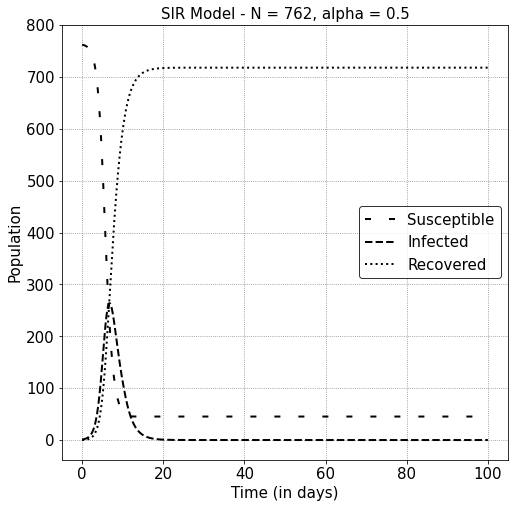

In [1269]:
#make figure
fig, ax = plt.subplots(figsize=[8,8])
t = np.linspace(0,t_final, int(n))

#plots
plt.plot(t, S, label='Susceptible', ls=(0, (3, 9)),lw=2, color='k')
plt.plot(t, I, label='Infected',ls='--',lw=2, color='k')
plt.plot(t, R, label='Recovered',ls=':',lw=2, color='k')

#plot formatting
plt.xlabel('Time (in days)', fontsize=15, color='k')
plt.ylabel('Population', fontsize=15, color='k')
plt.title('SIR Model - N = {}, alpha = {}'.format(N,alpha), fontsize=15, color='k')
plt.legend(fontsize=15, loc='best', edgecolor = 'k')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid( color='k', alpha=0.5, ls=':')

#show plot
plt.show()